## Word Embeddings

### Objectives:

* Introduction:

* Understand the concepts in word embeddings

* Use a pretrained word2vec model (spacy)

* Train a word2vec model on your own corpus (gensim)

* Visualize the results using PCA

*prerequisites: spacy, gensim*

---

### Introduction:

* What: Word embeddings are dense representations of words in a low-dimensional vector space. Embeddings translate discrete variables (words/phrases) to continuous vectors. Word embedding models (Genism / Glove) are to NLP as VGGNET is to image recognition; a pre-trained model, ready for use out the box.

* Why: three main uses for word embeddings:

    1- Finding nearest neighbors in the embedding space. These can be used to find similarities in terms, make recommendations based on user interests, cluster categories etc.

    2 - For visualization of concepts and relations between categories.

    3 - As input to a machine learning model for a supervised task.

* How: Optimize a supervised learning problem (neural word embedding), then use the weights of the activation layer vector as the word embedding representation of a particular word.

see ` Efficient Estimation of Word Representations in Vector Space by Mikolov et al.,2013` for more information

---

### Understand the concepts

Check out the `Tensorflow embedding projector` <http://projector.tensorflow.org/> to see a dimensionality reduced representation of the similarity between words

### The task:
* Predict context

![title](cbow_vs_skipg.png)

#### Input to the model:
* Tokenize text
    * Split your corpus
    * Enumerate through the set of words
    * Create a word dictionary and an id dictionary
    * Also works with CountVectorizer's vocabulary_ attribute

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
c = CountVectorizer()

In [14]:
vec_corpus = c.fit_transform(corpus)

In [15]:
vec_corpus.todense()

matrix([[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [16]:
c.vocabulary_

{'the': 15,
 'cat': 3,
 'sat': 7,
 'on': 6,
 'mat': 5,
 'she': 10,
 'sells': 9,
 'sea': 8,
 'shells': 11,
 'shore': 13,
 'backstreets': 2,
 'back': 1,
 'alright': 0,
 'sun': 14,
 'is': 4,
 'shining': 12}

In [17]:
corpus = ['The cat sat on the mat',
         'She sells sea shells on the sea shore',
         'Backstreets back alright',
         'The sun is shining']

In [18]:
import pandas as pd

df = pd.DataFrame(vec_corpus.todense(), columns = list(sorted(c.vocabulary_)))
df

,alright,back,backstreets,cat,is,mat,on,sat,sea,sells,she,shells,shining,shore,sun,the
0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,1,0,2,1,1,1,0,1,0,1
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


### The model

![title](skip_nn.png)

### Output from the model:

* A vectorized representation of the predictor word

* Lets see a pretrained model's implementation
    

---

### Use a pretrained word2vec model (spacy)

In [19]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [20]:
corpus.append('US political parties can succeed')

In [21]:
doc = nlp(corpus[len(corpus)-1])

In [22]:
political = doc[1]
parties = doc[2]
succeed = doc[4]

In [23]:
print(political.similarity(parties))
print(political.similarity(succeed))

0.09397331
-0.11618046


/Users/digitaldieter/miniconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/Users/digitaldieter/miniconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your ow

---

### Train a word2vec model on your own corpus (gensim)

In [24]:
from gensim.models import Word2Vec

In [25]:
new_corpus = [each.lower().split() for each in corpus]
new_corpus

[['the', 'cat', 'sat', 'on', 'the', 'mat'],
 ['she', 'sells', 'sea', 'shells', 'on', 'the', 'sea', 'shore'],
 ['backstreets', 'back', 'alright'],
 ['the', 'sun', 'is', 'shining'],
 ['us', 'political', 'parties', 'can', 'succeed']]

In [26]:
model = Word2Vec(new_corpus, size=4, window=3, min_count=1)

In [27]:
words = list(model.wv.vocab)

In [28]:
type(model.wv.vocab)

dict

---

### And visualise the results

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = model[model.wv.vocab]
print(X.shape)

(21, 4)


/Users/digitaldieter/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [30]:
new_x = pca.fit_transform(X)

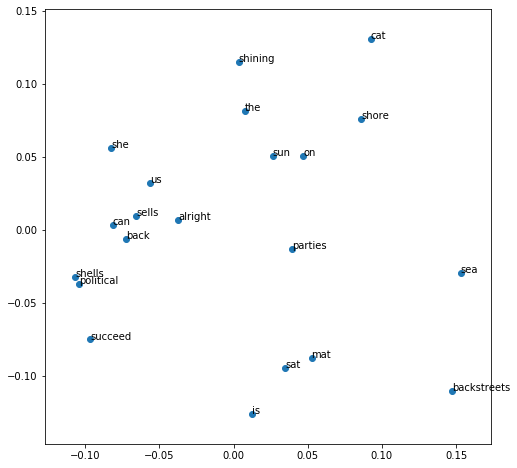

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(new_x[:,0], new_x[:,1])
for i, word in enumerate(words):
    plt.annotate(word, fontsize=10, xy=(new_x[i,0],new_x[i,1]))
plt.show()